# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [3]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [4]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [5]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [6]:
df = df_test.append(df_train).reset_index(drop=True)

In [7]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Высшее', 'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Неполное среднее', 'Среднее специальное'}


MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Нефтегазовая промышленность', 'Энергетика', 'Государственная служба', 'Развлечения/Искусство', 'Информационные технологии', 'Подбор персонала', 'Ресторанный бизнес/Общественное питание', 'Сборочные производства', 'Информационные услуги', 'Строительство', 'Металлургия/Промышленность/Машиностроение', 'Недвижимость', 'Страхование', 'Транспорт', 'Наука', 'Маркетинг', 'ЧОП/Детективная д-ть', 'Юридические услуги/нотариальные услуги', 'Логистика', 'Химия/Парфюмерия/Фармацевтика', 'СМИ/Реклама/PR-агенства', 'Управляющая компания', 'Банк/Финансы', 'Туризм', 'Торговля', 'Образование', 'Коммунальное хоз-во/Дорожные службы', 'Салоны красоты и здоровья', 'Сельское хозяйство', 'Другие сферы', 'Здравоохранение'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [8]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

Я удалил все строки в которых ['GEN_INDUSTRY'].isnull() разница в несколько % данных, а указывать вместо пусого значения мениану или моду считаю не логичным в [WORK_TIME'].isnull() я положил медиану df['WORK_TIME'].median() в ['ORG_TP_FCAPITAL'].isnull() я положил моду

In [9]:
df = df.drop(['AGREEMENT_RK', 'TP_PROVINCE','REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE', 'PREVIOUS_CARD_NUM_UTILIZED'],axis=1)
df = df[~df['GEN_INDUSTRY'].isnull()]
df = df[~df['REGION_NM'].isnull()]


In [10]:
df.loc[df['MARITAL_STATUS'] != u'Состою в браке', 'MARITAL_STATUS'] = 0
df.loc[df['MARITAL_STATUS'] == u'Состою в браке', 'MARITAL_STATUS'] = 1
df.loc[df['ORG_TP_FCAPITAL'] == u'Без участия', 'ORG_TP_FCAPITAL'] = 0
df.loc[df['ORG_TP_FCAPITAL'] == u'С участием', 'ORG_TP_FCAPITAL'] = 1
df.loc[df['WORK_TIME'].isnull(), 'WORK_TIME'] = df['WORK_TIME'].median()
df.loc[df['ORG_TP_FCAPITAL'].isnull(), 'ORG_TP_FCAPITAL'] = df['ORG_TP_FCAPITAL'].mode().iloc[0]

In [11]:
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 0 to 30132
Data columns (total 47 columns):
TARGET                 27418 non-null int64
AGE                    27418 non-null int64
SOCSTATUS_WORK_FL      27418 non-null int64
SOCSTATUS_PENS_FL      27418 non-null int64
GENDER                 27418 non-null int64
CHILD_TOTAL            27418 non-null int64
DEPENDANTS             27418 non-null int64
EDUCATION              27418 non-null object
MARITAL_STATUS         27418 non-null int64
GEN_INDUSTRY           27418 non-null object
GEN_TITLE              27418 non-null object
ORG_TP_STATE           27418 non-null object
ORG_TP_FCAPITAL        27418 non-null int64
JOB_DIR                27418 non-null object
FAMILY_INCOME          27418 non-null object
PERSONAL_INCOME        27418 non-null float64
REGION_NM              27418 non-null object
REG_FACT_FL            27418 non-null int64
FACT_POST_FL           27418 non-null int64
REG_POST_FL            27418 non-null int64
RE

In [18]:
tmp = df_train[['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','TP_PROVINCE','REGION_NM','WORK_TIME','PREVIOUS_CARD_NUM_UTILIZED']]
tmp.head()


,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,TP_PROVINCE,REGION_NM,WORK_TIME,PREVIOUS_CARD_NUM_UTILIZED
0,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,Оренбургская область,ПОВОЛЖСКИЙ,18.0,NaN
1,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,Ставропольский край,ЮЖНЫЙ,97.0,NaN
2,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,84.0,NaN
3,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Ростовская область,ЮЖНЫЙ,168.0,NaN
4,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Ставропольский край,ЮЖНЫЙ,101.0,NaN


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [20]:
#раз бить черех get_dummies

#### Задание 3. Фунция предобработки

In [26]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 0 to 30132
Columns: 121 entries, TARGET to FAMILY_INCOME_4
dtypes: float64(6), int64(33), object(1), uint8(81)
memory usage: 10.7+ MB


Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [12]:
def preproc_data(df_input):
    df_output = df_input.copy()
    education = [u'Ученая степень', u'Неполное среднее', u'Неоконченное высшее', u'Два и более высших образования', u'Высшее', u'Среднее', u'Среднее специальное']
    gen_industry = [u'Информационные услуги', u'Туризм', u'Торговля', u'Строительство', u'СМИ/Реклама/PR-агенства', u'Сельское хозяйство', u'Управляющая компания', u'Маркетинг', u'Коммунальное хоз-во/Дорожные службы', u'Здравоохранение', u'ЧОП/Детективная д-ть', u'Химия/Парфюмерия/Фармацевтика', u'Ресторанный бизнес/Общественное питание', u'Логистика', u'Юридические услуги/нотариальные услуги', u'Банк/Финансы', u'Наука', u'Подбор персонала', u'Недвижимость', u'Транспорт', u'Сборочные производства', u'Информационные технологии', u'Государственная служба', u'Развлечения/Искусство', u'Страхование', u'Нефтегазовая промышленность', u'Энергетика', u'Салоны красоты и здоровья', u'Металлургия/Промышленность/Машиностроение', u'Другие сферы', u'Образование']
    gen_title = [u'Партнер', u'Рабочий', u'Работник сферы услуг', u'Другое', u'Военнослужащий по контракту', u'Руководитель среднего звена', u'Индивидуальный предприниматель', u'Руководитель высшего звена', u'Руководитель низшего звена', u'Специалист', u'Высококвалифиц. специалист', u'Служащий']
    org_tp_state = [u'Частная ком. с инос. капиталом', u'Некоммерческая организация', u'Индивидуальный предприниматель', u'Государственная комп./учреж.', u'Частная компания']
    job_dir = [u'Вспомогательный техперсонал', u'Кадровая служба и секретариат', u'Реклама и маркетинг', u'Бухгалтерия, финансы, планир.', u'Юридическая служба', u'Служба безопасности', u'Адм-хоз. и трансп. службы', u'Участие в основ. деятельности', u'Снабжение и сбыт', u'Пр-техн. обесп. и телеком.']
    family_income = [ u'до 5000 руб.', u'от 20000 до 50000 руб.', u'от 10000 до 20000 руб.', u'свыше 50000 руб.', u'от 5000 до 10000 руб.']
    #tp_province = [u'Калининградская область', u'Ульяновская область', u'Пермская область', u'Сахалинская область', u'Омская область', u'Орловская область', u'Ставропольский край', u'Новгородская область', u'Воронежская область', u'Краснодарский край', u'Самарская область', u'Карелия', u'Кемеровская область', u'Смоленская область', u'Владимирская область', u'Якутия', u'Чувашия', u'Тульская область', u'Бурятия', u'Нижегородская область', u'Ханты-Мансийский АО', u'Архангельская область', u'Псковская область', u'Липецкая область', u'Кировская область', u'Свердловская область', u'Ярославская область', u'Кабардино-Балкария', u'Мурманская область', u'Башкирия', u'Приморский край', u'Москва', u'Тамбовская область', u'Пензенская область', u'Калужская область', u'Рязанская область', u'Челябинская область', u'Хабаровский край', u'Горный Алтай', u'Мордовская республика', u'Курская область', u'Тюменская область', u'Костромская область', u'Марийская республика', u'Адыгея', u'Брянская область', u'Амурская область', u'Удмуртия', u'Волгоградская область', u'Астраханская область', u'Иркутская область', u'Тверская область', u'Курганская область', u'Красноярский край', u'Читинская область', u'Санкт-Петербург', u'Белгородская область', u'Оренбургская область', u'Алтайский край', u'Ивановская область', u'Вологодская область', u'Камчатская область', u'Коми', u'Новосибирская область', u'Магаданская область', u'Еврейская АО', u'Томская область', u'Татарстан', u'Ростовская область', u'Саратовская область']
    region_num = [ u'ЗАПАДНО-СИБИРСКИЙ', u'ВОСТОЧНО-СИБИРСКИЙ', u'ПРИВОЛЖСКИЙ', u'ЮЖНЫЙ', u'ЦЕНТРАЛЬНЫЙ ОФИС', u'ПОВОЛЖСКИЙ', u'ДАЛЬНЕВОСТОЧНЫЙ', u'ЦЕНТРАЛЬНЫЙ 1', u'ЦЕНТРАЛЬНЫЙ 2', u'СЕВЕРО-ЗАПАДНЫЙ', u'УРАЛЬСКИЙ']

    df_output['EDUCATION'] = df_output['EDUCATION'].map(lambda x: education.index(x)).astype(int)
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].map(lambda x: gen_industry.index(x))
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].map(lambda x: gen_title.index(x))
    df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].map(lambda x: org_tp_state.index(x))
    df_output['JOB_DIR'] = df_output['JOB_DIR'].map(lambda x: job_dir.index(x))
    #df_output['TP_PROVINCE'] = df_output['TP_PROVINCE'].map(lambda x: tp_province.index(x))
    df_output['REGION_NM'] = df_output['REGION_NM'].map(lambda x: region_num.index(x))
    df_output['FAMILY_INCOME'] = df_output['FAMILY_INCOME'].map(lambda x: family_income.index(x))

    tst = pd.get_dummies(df_output, columns=['EDUCATION', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'JOB_DIR', 'REGION_NM', 'FAMILY_INCOME'])
    
    ## Your Code Here
    
    return df_output

In [108]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

y = df_train_preproc['TARGET']
df_train_preproc = df_train_preproc.drop(['TARGET'], axis=1)


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [109]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13855 entries, 14910 to 30132
Data columns (total 45 columns):
AGE                    13855 non-null int64
SOCSTATUS_WORK_FL      13855 non-null int64
SOCSTATUS_PENS_FL      13855 non-null int64
GENDER                 13855 non-null int64
CHILD_TOTAL            13855 non-null int64
DEPENDANTS             13855 non-null int64
EDUCATION              13855 non-null int64
MARITAL_STATUS         13855 non-null int64
GEN_INDUSTRY           13855 non-null int64
GEN_TITLE              13855 non-null int64
ORG_TP_STATE           13855 non-null int64
ORG_TP_FCAPITAL        13855 non-null int64
JOB_DIR                13855 non-null int64
FAMILY_INCOME          13855 non-null int64
PERSONAL_INCOME        13855 non-null float64
REGION_NM              13855 non-null int64
REG_FACT_FL            13855 non-null int64
FACT_POST_FL           13855 non-null int64
REG_POST_FL            13855 non-null int64
REG_FACT_POST_FL       13855 non-null int64
REG_F

In [110]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
x_train, x_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.3, random_state=42)


#### Задание 5. Обучение и оценка качества разных моделей

In [111]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

## Your Code Here
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predict_dtc = dtc.predict(x_test)
predict_proba_dtc = dtc.predict_proba(x_test)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predict_rfc = rfc.predict(x_test)
predict_proba_rfc = rfc.predict_proba(x_test)

lr = LogisticRegression()
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_test)
predict_proba_lr = lr.predict_proba(x_test)

In [112]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('DecisionTreeClassifier: ', precision_score(y_test, predict_dtc), recall_score(y_test, predict_dtc), accuracy_score(y_test, predict_dtc))
print('RandomForestClassifier: ',precision_score(y_test, predict_rfc), recall_score(y_test, predict_rfc),accuracy_score(y_test, predict_rfc))
print('LogisticRegression: ',precision_score(y_test, predict_lr), recall_score(y_test, predict_lr),accuracy_score(y_test, predict_lr))


DecisionTreeClassifier:  0.1792 0.20702402957486138 0.7733942747173442
RandomForestClassifier:  0.2222222222222222 0.0036968576709796672 0.8686552802501805
LogisticRegression:  0.25 0.0018484288354898336 0.8693769545345201


In [77]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает


(-0.01, 1.01)

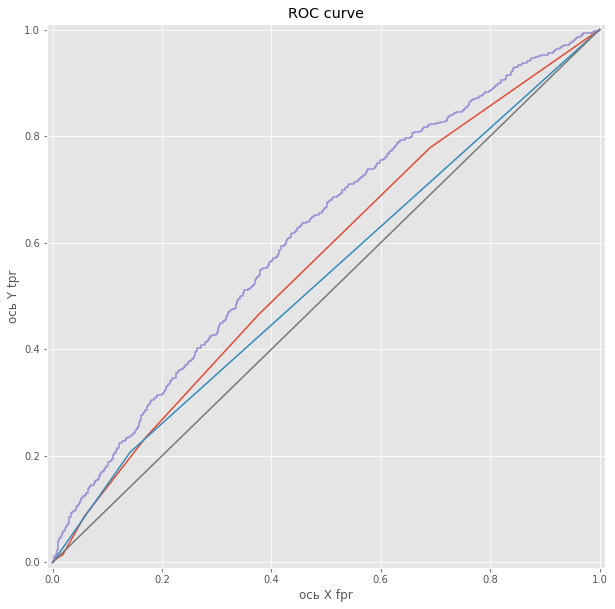

In [120]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predict_proba_rfc[:,1])
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, predict_proba_dtc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_proba_lr[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1])
plt.ylabel('ось Y tpr')
plt.xlabel('ось X fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [114]:
print('DecisionTreeClassifier: ', roc_auc_score(y_test, predict_proba_dtc[:,1]))
print('RandomForestClassifier: ', roc_auc_score(y_test, predict_proba_rfc[:,1]))
print('LogisticRegression: ', roc_auc_score(y_test, predict_proba_lr[:,1]))

DecisionTreeClassifier:  0.5325772802741563
RandomForestClassifier:  0.5628128424909623
LogisticRegression:  0.6125169711939542


In [122]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
cross_val_score(
    lr,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.63470141, 0.6396274 , 0.62254414, 0.66441086, 0.64675446,
       0.60648357, 0.59727235, 0.64939093, 0.61126776, 0.62557805])

In [118]:
cross_val_score(
    rfc,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.61109166, 0.57945324, 0.58670877, 0.6054849 , 0.62942232,
       0.63317966, 0.58264719, 0.57239031, 0.53390058, 0.59229547])

In [117]:
cross_val_score(
    dtc,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.50912593, 0.49775879, 0.54251033, 0.54162202, 0.51558623,
       0.52204113, 0.52189779, 0.50634446, 0.53036647, 0.54090298])

In [129]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
y = df_test_preproc['TARGET']
x_train, x_test, y_train, y_test = train_test_split(df_test_preproc, y, test_size=0.3, random_state=42)

#predict = 
## Your Code Here
predict = lr.predict(X_test)

predict_proba = lr.predict_proba(X_test)
predict_proba[:,1]

array([0.13377302, 0.06315716, 0.11610089, ..., 0.14110239, 0.0559094 ,
       0.13413308])

In [131]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
cross_val_score(
    lr,
    df_test_preproc,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.60630949, 0.99974978, 0.60895398, 0.96804043, 0.81589147,
       0.87541949, 0.70082167, 0.63800478, 0.75794709, 0.80492828])

(-0.01, 1.01)

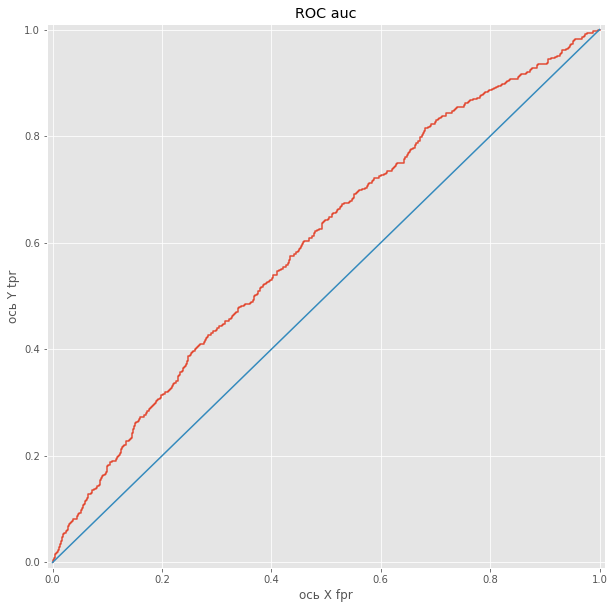

In [133]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1])
plt.ylabel('ось Y tpr')
plt.xlabel('ось X fpr')
plt.grid(True)
plt.title('ROC auc')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)